<h1><center> PPOL 5203 Data Science I: Foundations <br><br> 
<font color='grey'> Working with Text as Data<br><br>
Tiago Ventura </center> <h1> 

---

## Learning Goals

In the class today, we will start learning about working with text as data in Python. This notebook will cover: 

- Opening text data in Python
- Strategies to pre-process data
- Converting text to a numerical representation (sparse matrix)
- Descriptive analysis of text
    - Bigrams and TF-IDF
    - Similarity of documents
    
- Unsupervised Learning:
    - topic models

## Natural Language Processing (NLP) vs Text-as-Data

Computer Scientists often refer to Natural Language Processing (NLP) as the field that focuses on developing tools to process natural language (text, audio, videos) using computers. On the other side, social scientists and applied data scientists will often use terms as text-as-data, or even computational linguistics, as the field that focus on developing tools/models to incorporate textual data in their data analysis pipelines. 

These fields are very closely connected, share similar methodological tools, and develop solutions to similar problems. Some of the applications of these fields are different due to the nature of each field. For example:

- **Computer Scientists (NLP)** are often more interested in taks such as: machine Translation, chatbots and virtual assistants, generative AI, speech recognition, among others. 

- **Social Scientists (text-as-data)** are often more interested in tasks as: document similarity, topic discovery, content analysis, text classification. 

My approach is to consider these perspectives more as a integrated disciplinary field that focus on different tasks than as two separate perspectives. For this reason, I will often use the terms NLP and text-as-data interchangeably, even though most of the application we will see in the next two week are closer to a social scientist applied perspective to work with text data. 

In the Spring, I will teach a full semester in Text-as-Data. You can see the syllabus, and there is a mix of tasks/methods from each field.


## NLTK

The Natural Language Toolkit (NLTK) is a popular open-source library for natural language processing (NLP) in Python. According to the NLTK textbook, the library  works under the following principles:

- **Simplicity:** To provide an intuitive framework along with substantial building blocks, giving users a practical knowledge of NLP without getting bogged down in the tedious house-keeping usually associated with processing annotated language data

- **Consistency:** To provide a uniform framework with consistent interfaces and data structures, and easily-guessable method names

- **Extensibility:** To provide a structure into which new software modules can be easily accommodated, including alternative implementations and competing approaches to the same task

- **Modularity:** To provide components that can be used independently without needing to understand the rest of the toolkit

NLTK is widely used by researchers, developers, and data scientists worldwide to develop NLP applications and analyze text data. We will use NLTK for the most basic steps on NLP, particularly, pre-processing and converting texts to matrices. 

## NLTK Setup

In [2]:
# !pip install nltk
import nltk

# download nltk and close
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Importing Text Data

We will see three different ways to import textual data: 

- Working with textual data from NLTK
- Importing as .txt locally
- Importing text as a column in Pandas

### nltk data libraries

Read more here about text data available with nltk: https://www.nltk.org/book/ch02.html

Let's see some examples below

In [2]:
# import nltk guttenberg books
# see all books available
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
# openning jane austen emma as words
emma = nltk.corpus.gutenberg.words('austen-emma.txt')

In [4]:
type(emma)

nltk.corpus.reader.util.StreamBackedCorpusView

In [5]:
# converting to a list
emma_list = [w.lower() for w in emma]

# print
emma_list[:10]

['[', 'emma', 'by', 'jane', 'austen', '1816', ']', 'volume', 'i', 'chapter']

### Open local text files

To open text files we have saved locally, we should use the file connections tools we learned early in the course. 

I have in my working directory the first chapter of the [Red Rising book](https://en.wikipedia.org/wiki/Red_Rising) I was reading early this year. Let's open it. 

In [6]:
# open red_rising.txt

# Using 'with' to open the file
with open('red_rising.txt', 'r') as file:
    # Read the content of the file
    content = file.read()


In [8]:
# open as a string
content[0:1000]

'Helldiver\n\nThe first thing you should know about me is I am my father‚Äôs son. And when they came for him, I did as he asked. I did not cry. Not when the Society televised the arrest. Not when the Golds tried him. Not when the Grays hanged him. Mother hit me for that. My brother Kieran was supposed to be the stoic one. He was the elder, I the younger. I was supposed to cry. Instead, Kieran bawled like a girl when Little Eo tucked a haemanthus into Father‚Äôs left workboot and ran back to her own father‚Äôs side. My sister Leanna murmured a lament beside me. I just watched and thought it a shame that he died dancing but without his dancing shoes.\n\nOn Mars there is not much gravity. So you have to pull the feet to break the neck. They let the loved ones do it.\n\nI smell my own stink inside my frysuit. The suit is some kind of nanoplastic and is hot as its name suggests. It insulates me toe to head. Nothing gets in. Nothing gets out. Especially not the heat. Worst part is you can‚Äô

In [10]:
# convert to a list using string methods
rr_lines = [c for c in content.split("\n") if c != ""]
rr_lines[0:5]

['Helldiver',
 'The first thing you should know about me is I am my father‚Äôs son. And when they came for him, I did as he asked. I did not cry. Not when the Society televised the arrest. Not when the Golds tried him. Not when the Grays hanged him. Mother hit me for that. My brother Kieran was supposed to be the stoic one. He was the elder, I the younger. I was supposed to cry. Instead, Kieran bawled like a girl when Little Eo tucked a haemanthus into Father‚Äôs left workboot and ran back to her own father‚Äôs side. My sister Leanna murmured a lament beside me. I just watched and thought it a shame that he died dancing but without his dancing shoes.',
 'On Mars there is not much gravity. So you have to pull the feet to break the neck. They let the loved ones do it.',
 'I smell my own stink inside my frysuit. The suit is some kind of nanoplastic and is hot as its name suggests. It insulates me toe to head. Nothing gets in. Nothing gets out. Especially not the heat. Worst part is you ca

In [12]:
# By word
rr_words = content.split(" ")
rr_words[0:10]


['Helldiver\n\nThe',
 'first',
 'thing',
 'you',
 'should',
 'know',
 'about',
 'me',
 'is',
 'I']

In [13]:
# a bit more to remove line breaks
rr_words_ = [i for el in rr_words for i in el.split("\n")]
rr_words_

['Helldiver',
 '',
 'The',
 'first',
 'thing',
 'you',
 'should',
 'know',
 'about',
 'me',
 'is',
 'I',
 'am',
 'my',
 'father‚Äôs',
 'son.',
 'And',
 'when',
 'they',
 'came',
 'for',
 'him,',
 'I',
 'did',
 'as',
 'he',
 'asked.',
 'I',
 'did',
 'not',
 'cry.',
 'Not',
 'when',
 'the',
 'Society',
 'televised',
 'the',
 'arrest.',
 'Not',
 'when',
 'the',
 'Golds',
 'tried',
 'him.',
 'Not',
 'when',
 'the',
 'Grays',
 'hanged',
 'him.',
 'Mother',
 'hit',
 'me',
 'for',
 'that.',
 'My',
 'brother',
 'Kieran',
 'was',
 'supposed',
 'to',
 'be',
 'the',
 'stoic',
 'one.',
 'He',
 'was',
 'the',
 'elder,',
 'I',
 'the',
 'younger.',
 'I',
 'was',
 'supposed',
 'to',
 'cry.',
 'Instead,',
 'Kieran',
 'bawled',
 'like',
 'a',
 'girl',
 'when',
 'Little',
 'Eo',
 'tucked',
 'a',
 'haemanthus',
 'into',
 'Father‚Äôs',
 'left',
 'workboot',
 'and',
 'ran',
 'back',
 'to',
 'her',
 'own',
 'father‚Äôs',
 'side.',
 'My',
 'sister',
 'Leanna',
 'murmured',
 'a',
 'lament',
 'beside',
 'me.',


### Open from a Pandas Data Frame

We will use Twitter data. This dataset has a collection of Twitter timelines of all members of the 117th Congress for the year of 2021. It is a rich dataset, and interesting to play with for some descriptive text analysis. 

We will work mostly with the columns `text`

In [14]:
import pandas as pd
import numpy as np

### Download the data 

Get the data [here](https://www.dropbox.com/scl/fi/tb67w3j2p6y3lmi186pzj/tweets_congress.csv?rlkey=k0wevbiru9tw4gyxvnkq3x1bm&dl=0)

In [16]:
# Open data
tweets_data = pd.read_csv("tweets_congress.csv")
tweets_data.head()

author                                               text  \
0  AustinScottGA08  It is my team‚Äôs privilege to help our constitu...   
1  AustinScottGA08  I am proud to have sponsored this amendment wh...   
2  AustinScottGA08  From my family to yours, we wish you peace, jo...   
3  AustinScottGA08  President Biden and Congress have a responsibi...   
4  AustinScottGA08  Happy second birthday to @SpaceForceDoD!\n\nSe...   

                             date  \
0  Fri Dec 31 18:24:51 +0000 2021   
1  Wed Dec 29 20:14:48 +0000 2021   
2  Sat Dec 25 16:48:16 +0000 2021   
3  Wed Dec 22 19:14:13 +0000 2021   
4  Mon Dec 20 15:37:11 +0000 2021   

                                                bios retweet_author  \
0  I am proud to represent the 8th Congressional ...            NaN   
1  I am proud to represent the 8th Congressional ...            NaN   
2  I am proud to represent the 8th Congressional ...            NaN   
3  I am proud to represent the 8th Congressional ...            NaN   
4  I am proud to represent the 8th Congressional ...            NaN   

            Name                                 Link State Party congress  
0  Scott, Austin  https://twitter.com/AustinScottGA08    GA     R    House  
1  Scott, Austin  https://twitter.com/AustinScottGA08    GA     R    House  
2  Scott, Austin  https://twitter.com/AustinScottGA08    GA     R    House  
3  Scott, Austin  https://twitter.com/AustinScottGA08    GA     R    House  
4  Scott, Austin  https://twitter.com/AustinScottGA08    GA     R    House

In [17]:
tweets_data.shape

(1266542, 10)

In [18]:
# reduce the size of the data a bit
import random
authors = tweets_data["author"].unique()[random.sample(range(1, 425), 10)]
tweets_data_ = tweets_data[tweets_data['author'].str.contains("|".join(authors))].copy()

In [21]:
tweets_data_.shape

(29198, 10)

## Pre-Processing Steps

Almost every data science task using text requires data to be preprocessed before running any type of analysis. These tasks often consists on reducing noise on text data - making the the data more informative and less complex - and converting the data to formats computer understand. 

The most commong pre-processing steps are: 

- **tokenization**:  splitting text into words or tokens.

- **normalization**: convert text to all lowercase and removing punctuation

- **stop word removal**: remove noise, words with little meaning. Usually involves a pre-defined set of words + some domain knowledge/context dependet words

- **stemming**: removing the suffixes from words, such as "ing" or "ed," to reduce them to their base form

- **lemmatization**: relies on accurately determining the intended part-of-speech and the meaning of a word based on its context.


**Important:** pre-processing steps can profoundly change what your text looks like. See this article here to understand more in-depth some trade-offs associated with pre-processing steps: https://www.cambridge.org/core/journals/political-analysis/article/abs/text-preprocessing-for-unsupervised-learning-why-it-matters-when-it-misleads-and-what-to-do-about-it/AA7D4DE0AA6AB208502515AE3EC6989E

The implementation of these steps consists of a mix of `string` methods and `nltk` methods. Let's see examples with the Politicians tweets datasets.


In [22]:
# import nltk methods

# stopwords
from nltk.corpus import stopwords

# tokenizer
from nltk.tokenize import word_tokenize

# lemmatizer
from nltk.stem import WordNetLemmatizer

# stemming
from nltk.stem.porter import PorterStemmer

#### Tokenizetion

- `word_tokenize()` from nltk

In [23]:
# apply as a dataframe # with half of the dataframe
import time
tweets_data_["tokens"] = tweets_data_["text"].apply(word_tokenize)

In [25]:
# see
tweets_data_["tokens"]

245028     [Happy, New, Year, ,, #, NH02, !, As, we, ring...
245029     [The, best, way, to, protect, yourself, ,, you...
245030     [Congressman, Jamie, Raskin, is, a, tireless, ...
245031     [To, everyone, celebrating, here, in, New, Ham...
245032     [Last, night, following, calls, from, NH, ‚Äô, s...
                                 ...                        
1238712    [Carney, days, Repubs, are, ``, ransoming, '',...
1238713    [Jay, Carney, says, House, should, pass, somet...
1238714    [RT, @, RepTomPrice, :, 11,588,500, =, The, nu...
1238715    [ICYMI, :, Congressman, Weber, spoke, on, Hous...
1238716    [A, $, 17, trillion, debt, is, not, the, legac...
Name: tokens, Length: 29198, dtype: object

#### Normalization

- `isalpha()` - string methods to remove punctuation
- `lower()` - string methods to convert text to lower

In [26]:
# normalization
tweets_data_["tokens"] = tweets_data_["tokens"].apply(lambda x: [word.lower() for word in x if word.isalpha()])
tweets_data_["tokens"].head()

245028    [happy, new, year, as, we, ring, in, i, hope, ...
245029    [the, best, way, to, protect, yourself, your, ...
245030    [congressman, jamie, raskin, is, a, tireless, ...
245031    [to, everyone, celebrating, here, in, new, ham...
245032    [last, night, following, calls, from, nh, s, f...
Name: tokens, dtype: object

#### Remove stop words

- `stopwords.words('english')` from nltk

In [27]:
# import stopword first
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**Want to add some more?**

In [28]:
stop_words = stop_words + (["dr", "mr", "miss","congressman","congresswomen", "http", "rt"])

In [29]:
# remove
tweets_data_["tokens"] = tweets_data_["tokens"].apply(lambda x: [word for word in x if word not in stop_words])
tweets_data_["tokens"]

245028     [happy, new, year, ring, hope, find, time, ref...
245029     [best, way, protect, family, amp, community, c...
245030     [jamie, raskin, tireless, defender, country, d...
245031     [everyone, celebrating, new, hampshire, across...
245032     [last, night, following, calls, nh, federal, d...
                                 ...                        
1238712    [carney, days, repubs, ransoming, desire, defu...
1238713    [jay, carney, says, house, pass, something, hm...
1238714    [reptomprice, number, words, included, final, ...
1238715    [icymi, weber, spoke, house, floor, talk, pres...
1238716            [trillion, debt, legacy, leave, children]
Name: tokens, Length: 29198, dtype: object

#### stemming

We stem the tokens using `nltk.stem.porter.PorterStemmer` to get the stemmed tokens.

In [30]:
# instatiate the stemmer
porter = PorterStemmer()

# run
tweets_data_["tokens"] = tweets_data_["tokens"].apply(lambda x: [porter.stem(word) for word in x if word])

# see
tweets_data_["tokens"].head()

245028    [happi, new, year, ring, hope, find, time, ref...
245029    [best, way, protect, famili, amp, commun, covi...
245030    [jami, raskin, tireless, defend, countri, demo...
245031    [everyon, celebr, new, hampshir, across, count...
245032    [last, night, follow, call, nh, feder, deleg, ...
Name: tokens, dtype: object

#### lemmatization

We will lemmatize the tokens using `WordNetLemmatizer()` from nltk

In [31]:
# import
from nltk.stem import WordNetLemmatizer

# instantiate
lemmatizer = WordNetLemmatizer()

# run (doenst' make much sense to run on a stemm, but just for your reference)
tweets_data_["tokens"] = tweets_data_["tokens"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x if word])

# see
tweets_data_["tokens"].tail()

1238712    [carney, day, repub, ransom, desir, defund, ob...
1238713    [jay, carney, say, hous, pas, someth, hmm, lik...
1238714    [reptompric, number, word, includ, final, obam...
1238715    [icymi, weber, spoke, hous, floor, talk, presi...
1238716                [trillion, debt, legaci, leav, child]
Name: tokens, dtype: object

## Bag-of-Words: Document-Feature Matrix Representation

As we saw in the lecture, our next step is to represent text numerically. We will do so by using the Bag of Words assumption. This assumption states that we represent text as an unordered set of words in a document. 

- Order is ignored; 
- frequency matters. 

Remember, the idea here is to represent text data as numbers. We do so by breaking the text in words, and counting them. A standard way to do so is by using a **Document-Feature Matrix (DFM)**

- **Rows**: documents of the corpus
- **Columns**: feature or tokens or words
- **Cell**: number of times a word _j_ occurs in document _i_

To create a DFM, we will use the `CountVectorizer()` method from `sklearn`

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

# combine the pre-processed data
tweets_data_['tokens_join'] = tweets_data_['tokens'].apply(' '.join)

# instantiate a vectorizer
vectorizer = CountVectorizer()

# transform the data
dfm = vectorizer.fit_transform(tweets_data_['tokens_join'])


In [33]:
# oput is a matrix
type(dfm)

scipy.sparse._csr.csr_matrix

In [34]:
# Convert the matrix to an array and display it
feature_matrix = dfm.todense()

In [35]:
# super sparse matrix
feature_matrix

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [36]:
# Get feature names to use as dataframe column headers
feature_names = vectorizer.get_feature_names_out()

In [38]:
# Create a DataFrame with the feature matrix
df = pd.DataFrame(feature_matrix, columns=feature_names)
df

aaa  aabb  aacnurs  aafp  aaglasvega  aamer  aaohnsgovtaffr  aapi  \
0        0     0        0     0           0      0               0     0   
1        0     0        0     0           0      0               0     0   
2        0     0        0     0           0      0               0     0   
3        0     0        0     0           0      0               0     0   
4        0     0        0     0           0      0               0     0   
...    ...   ...      ...   ...         ...    ...             ...   ...   
29193    0     0        0     0           0      0               0     0   
29194    0     0        0     0           0      0               0     0   
29195    0     0        0     0           0      0               0     0   
29196    0     0        0     0           0      0               0     0   
29197    0     0        0     0           0      0               0     0   

       aapiheritagemonth  aaron  ...  ùòÄùó≤ùóøùòÉùó∂ùó∞ùó≤  ùòÄùòÇùóØùòÑùóÆùòÜ  ùòÅùóµùó≤  ùòÅùóº  ùòÅùóºùó∫ùóºùóøùóøùóºùòÑ  \
0                      0      0  ...        0       0    0   0         0   
1                      0      0  ...        0       0    0   0         0   
2                      0      0  ...        0       0    0   0         0   
3                      0      0  ...        0       0    0   0         0   
4                      0      0  ...        0       0    0   0         0   
...                  ...    ...  ...      ...     ...  ...  ..       ...   
29193                  0      0  ...        0       0    0   0         0   
29194                  0      0  ...        0       0    0   0         0   
29195                  0      0  ...        0       0    0   0         0   
29196                  0      0  ...        0       0    0   0         0   
29197                  0      0  ...        0       0    0   0         0   

       ùòÑùó∂ùóπùóπ  ùòºùô®ùô•ùôûùôßùôûùô£ùôú  ùôàùôûùô°ùô°ùôûùô§ùô£ùô©ùôù  ùôèùôäùôàùôäùôçùôçùôäùôí  ùôöùô£ùô©ùôßùôöùô•ùôßùôöùô£ùôöùô™ùôßùô®  
0         0         0          0         0              0  
1         0         0          0         0              0  
2         0         0          0         0              0  
3         0         0          0         0              0  
4         0         0          0         0              0  
...     ...       ...        ...       ...            ...  
29193     0         0          0         0              0  
29194     0         0          0         0              0  
29195     0         0          0         0              0  
29196     0         0          0         0              0  
29197     0         0          0         0              0  

[29198 rows x 16403 columns]

hugely sparse data!!

### Visualizing most used words

With this representation, we can actually start visualizing some interesting patterns in the data. 

For example, we can visualize the most distictive words tweets by each politician. In this case, we need: 

- Change unit of analysis from tweets to politicians
- Join all tweets by politician
- Pre-process the text
- Build the dfm
- Estimate some type of distictiveness measure


In [39]:
tweets_data.head()

author                                               text  \
0  AustinScottGA08  It is my team‚Äôs privilege to help our constitu...   
1  AustinScottGA08  I am proud to have sponsored this amendment wh...   
2  AustinScottGA08  From my family to yours, we wish you peace, jo...   
3  AustinScottGA08  President Biden and Congress have a responsibi...   
4  AustinScottGA08  Happy second birthday to @SpaceForceDoD!\n\nSe...   

                             date  \
0  Fri Dec 31 18:24:51 +0000 2021   
1  Wed Dec 29 20:14:48 +0000 2021   
2  Sat Dec 25 16:48:16 +0000 2021   
3  Wed Dec 22 19:14:13 +0000 2021   
4  Mon Dec 20 15:37:11 +0000 2021   

                                                bios retweet_author  \
0  I am proud to represent the 8th Congressional ...            NaN   
1  I am proud to represent the 8th Congressional ...            NaN   
2  I am proud to represent the 8th Congressional ...            NaN   
3  I am proud to represent the 8th Congressional ...            NaN   
4  I am proud to represent the 8th Congressional ...            NaN   

            Name                                 Link State Party congress  
0  Scott, Austin  https://twitter.com/AustinScottGA08    GA     R    House  
1  Scott, Austin  https://twitter.com/AustinScottGA08    GA     R    House  
2  Scott, Austin  https://twitter.com/AustinScottGA08    GA     R    House  
3  Scott, Austin  https://twitter.com/AustinScottGA08    GA     R    House  
4  Scott, Austin  https://twitter.com/AustinScottGA08    GA     R    House

In [40]:
# change unit of analysis
tweets_data_g = tweets_data.groupby(["author","State", "Party"])["text"].apply(lambda x: "".join(x)).reset_index().copy()

In [41]:
tweets_data_g

author State Party  \
0    AustinScottGA08    GA     R   
1    BennieGThompson    MS     D   
2    BettyMcCollum04    MN     D   
3       BillPascrell    NJ     D   
4         BobbyScott    VA     D   
..               ...   ...   ...   
420  replouiegohmert    TX     R   
421     repmarkpocan    WI     D   
422      rosadelauro    CT     D   
423    senrobportman    OH     R   
424     virginiafoxx    NC     R   

                                                  text  
0    It is my team‚Äôs privilege to help our constitu...  
1    RT @DerrickNAACP: If you can afford to pause s...  
2    Happy New Year! May 2022 bring you peace &amp;...  
3    Some sage words of wisdom from the FDR Memoria...  
4    RT @EdLaborCmte: At 12am, we will finally say ...  
..                                                 ...  
420  I recently had the honor of guest hosting the ...  
421  Betty White could get anyone to laugh. An Amer...  
422  May you and your family have a joyful, happy, ...  
423  It is clear that with record levels of unlawfu...  
424  Happy New Year!\n\nWho‚Äôs ready for the #RedWav...  

[425 rows x 4 columns]

In [42]:
# see
authors = ["RepAOC", "Ilhan", "SpeakerPelosi", "marcorubio", "SenatorTimScott", 
           "SenTedCruz", "Jim_Jordan", "GOPLeader"]

# make a copy
reps = tweets_data_g[tweets_data_g["author"].str.contains("|".join(authors))].copy()

In [43]:
reps

author State Party  \
23         GOPLeader    CA     R   
27             Ilhan    MN     D   
31        Jim_Jordan    OH     R   
53            RepAOC    NY     D   
359       SenTedCruz    TX     R   
388  SenatorTimScott    SC     R   
390    SpeakerPelosi    CA     D   

                                                  text  
23   Happy new year! https://t.co/GQA2zzlmWLRT @Rep...  
27   Now would be a good time to cancel student deb...  
31   Happy New Year. God Bless America!RT @GOPLeade...  
53   Millions of Yemenis are facing famine due to c...  
359  Heidi &amp; I wish you all a happy, healthy, a...  
388  Happy New Year!¬†\n¬†\nWishing everyone peace, p...  
390  May this New Year usher in a time of joy, pros...

In [45]:
stop_words = stop_words + ["new", "https", "rt"]

In [46]:
# pre-process

# tokenize
reps["tokens"] = reps["text"].apply(word_tokenize)

# normalize
reps["tokens"] = reps["tokens"].apply(lambda x: [word.lower() for word in x if word.isalpha()])

# stem and stopwords
reps["tokens"] = reps["tokens"].apply(lambda x: [porter.stem(word) for word in x if word not in stop_words])

In [47]:
## Create dfm
# combine the pre-processed data
reps['tokens_join'] = reps['tokens'].apply(' '.join)

# instantiate a vectorizer
vectorizer = CountVectorizer()

# transform the data
dfm = vectorizer.fit_transform(reps['tokens_join'])


In [48]:
dfm.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [49]:
# convert df
dfm_d = pd.DataFrame(dfm.toarray(), 
                     columns=vectorizer.get_feature_names_out(), 
                     index=reps["author"])

In [50]:
# see the dataset
dfm_d

aaa  aadaw  aalftwinc  aapi  aaron  aarpca  ab  \
author                                                            
GOPLeader          1      0          0     0      0       0   1   
Ilhan              0      1          1     5      0       0   0   
Jim_Jordan         0      0          0     0      0       0   0   
RepAOC             0      0          0     2      0       0   0   
SenTedCruz         0      0          0     0      0       0   0   
SenatorTimScott    0      0          0     0      1       0   0   
SpeakerPelosi      0      0          0     6      0       1   0   

                 abajoladictadura  abandon  abbevil  ...  ùôÉùô§ùô¨  ùôóùô§ùôßùôôùôöùôß  \
author                                               ...                
GOPLeader                       0       23        0  ...    1       1   
Ilhan                           0        1        0  ...    0       0   
Jim_Jordan                      0        5        0  ...    0       0   
RepAOC                          0        0        0  ...    0       0   
SenTedCruz                      1       17        0  ...    0       0   
SenatorTimScott                 0        2        4  ...    0       0   
SpeakerPelosi                   0        4        0  ...    0       0   

                 ùôòùô§ùô¢ùô•ùôßùôöùôùùôöùô£ùô®ùôûùô´ùôö  ùôòùôßùôöùôñùô©ùôö  ùôòùôßùôûùô®ùôûùô®  ùô¢ùô§ùôßùôö  ùô©ùô§  ùô∞ùöôùöõùöíùöï  ùôøùôøùôø  ùöÑùôøùô≥ùô∞ùöÉùô¥  
author                                                                        
GOPLeader                    1       1       1     3   1      0    0       0  
Ilhan                        0       0       0     0   0      0    0       0  
Jim_Jordan                   0       0       0     0   0      0    0       0  
RepAOC                       0       0       0     0   0      0    0       0  
SenTedCruz                   0       0       0     0   0      0    0       0  
SenatorTimScott              0       0       0     0   0      1    1       1  
SpeakerPelosi                0       0       0     0   0      0    0       0  

[7 rows x 11979 columns]

In [51]:
# overall most important features
index = dfm_d.sum().sort_values(ascending=False).index

In [52]:
index

Index(['biden', 'american', 'democrat', 'amp', 'presid', 'border', 'today',
       'hous', 'peopl', 'year',
       ...
       'kermit', 'kerik', 'kenya', 'kentuckymbb', 'kenpaxtontx',
       'kendilaniannbc', 'kelseykoberg', 'kellynashradio', 'kellymakena',
       'ùöÑùôøùô≥ùô∞ùöÉùô¥'],
      dtype='object', length=11979)

In [53]:
# see the most important features
dfm_d[index]

biden  american  democrat  amp  presid  border  today  hous  \
author                                                                         
GOPLeader          766       365       520  201     361     523    141   234   
Ilhan               25       190        15   92     108      19    165   188   
Jim_Jordan         434       173       334   69     275     168     96   103   
RepAOC              11        29         9  101       9       0     77    57   
SenTedCruz         758       197       262  267     157     309    114    27   
SenatorTimScott     93       202       159  168      87      49    247    58   
SpeakerPelosi       61       454       154  510     290       2    176   300   

                 peopl  year  ...  kermit  kerik  kenya  kentuckymbb  \
author                        ...                                      
GOPLeader          125   146  ...       0      0      0            0   
Ilhan              222   134  ...       0      0      1            0   
Jim_Jordan          66    59  ...       1      1      0            0   
RepAOC              45    42  ...       0      0      0            0   
SenTedCruz          89    91  ...       0      0      0            0   
SenatorTimScott    104   152  ...       0      0      0            1   
SpeakerPelosi      180   185  ...       0      0      0            0   

                 kenpaxtontx  kendilaniannbc  kelseykoberg  kellynashradio  \
author                                                                       
GOPLeader                  0               1             1               0   
Ilhan                      0               0             0               0   
Jim_Jordan                 1               0             0               0   
RepAOC                     0               0             0               0   
SenTedCruz                 0               0             0               0   
SenatorTimScott            0               0             0               1   
SpeakerPelosi              0               0             0               0   

                 kellymakena  ùöÑùôøùô≥ùô∞ùöÉùô¥  
author                                
GOPLeader                  0       0  
Ilhan                      0       0  
Jim_Jordan                 0       0  
RepAOC                     1       0  
SenTedCruz                 0       0  
SenatorTimScott            0       1  
SpeakerPelosi              0       0  

[7 rows x 11979 columns]

In [54]:
# most features words by candidate

# clean to capture top 10 terms
dfm_d.index.name = "author_tweet"

# contained
df_list = list()


# get top terms by group
for id, row in dfm_d.groupby("author_tweet"):
    idx = row.sum().sort_values(ascending=False).index
    temp = row.loc[:, idx].reset_index().melt(id_vars=["author_tweet"]).iloc[0:10, :]
    df_list.append(temp)

# concat
top_terms = pd.concat(df_list, axis=0)

In [55]:
top_terms

author_tweet  variable  value
0       GOPLeader     biden    766
1       GOPLeader    border    523
2       GOPLeader  democrat    520
3       GOPLeader  american    365
4       GOPLeader    presid    361
..            ...       ...    ...
5   SpeakerPelosi    famili    219
6   SpeakerPelosi   capitol    217
7   SpeakerPelosi     trump    204
8   SpeakerPelosi       act    193
9   SpeakerPelosi      year    185

[70 rows x 3 columns]

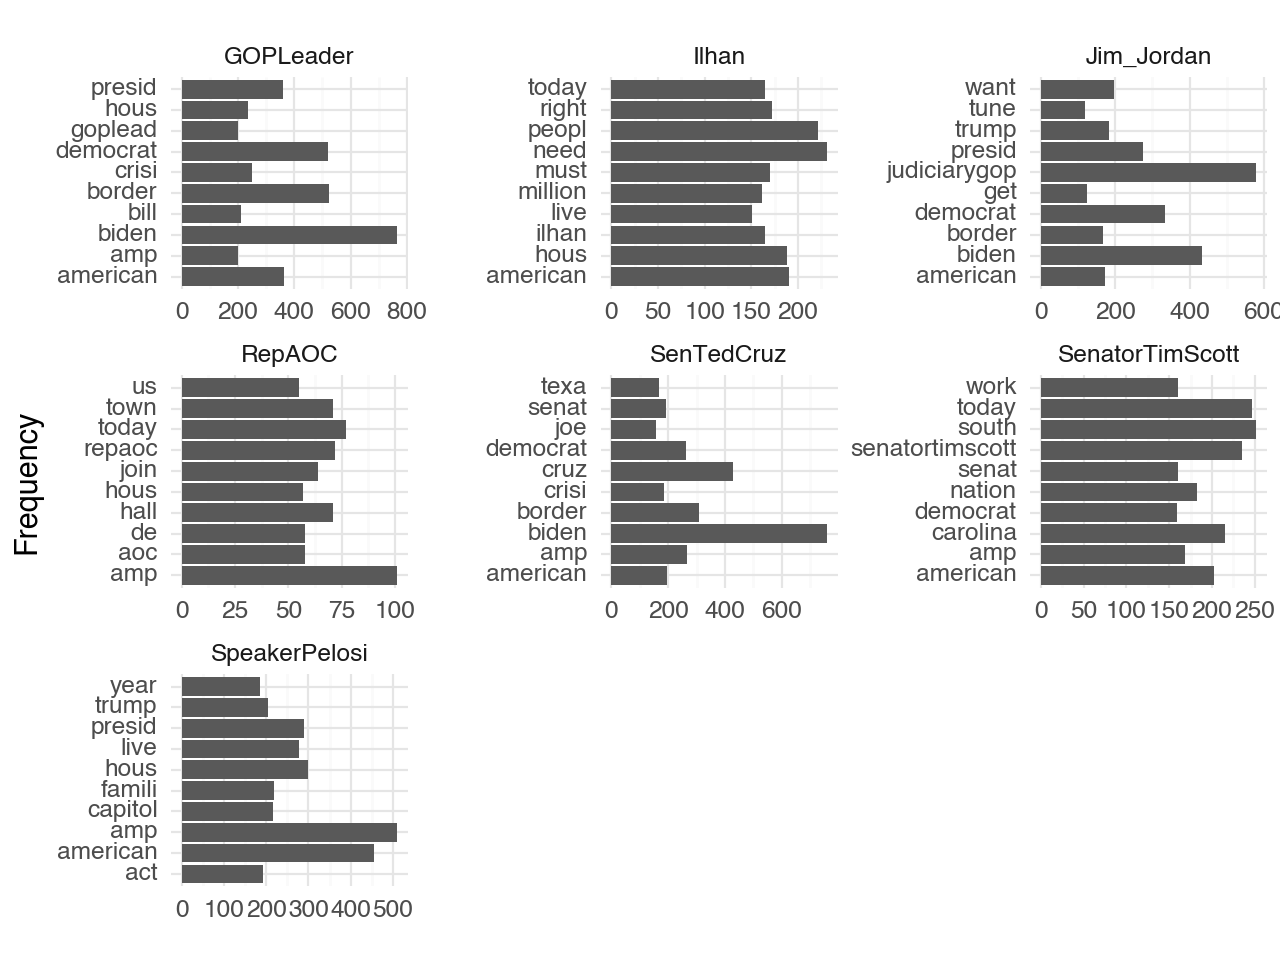

<Figure Size: (640 x 480)>

In [56]:
# visualize
from plotnine import *

# plot
(ggplot(top_terms, aes(x='variable', y='value')) +
    geom_bar(stat='identity') +
    facet_wrap('~author_tweet', scales='free') +
    coord_flip() +  # To make horizontal bar plots
    theme(subplots_adjust={'wspace': 0.25},  # Adjust the space between plots
          axis_text_y=element_text(size=10),  # Adjust text size for y axis
          figure_size=(15, 10)) +  # Adjust the figure size
    labs(x='Frequency', y='') +
 theme_minimal()
) 

### Other ways to count better than simple frequencies

Counts of simple frequencies is a bit silly. Let's look at other ways to count that retrieve more information: 

### N-Grams

N-grams: count words that appear together with a N-size window


### TF-IDF: 

It is a weighted measure of counts by the number of times the term appears in other documents.

#### Term-Frequency

$$\text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in a document } d}{\text{Total number of terms in the document } d}$$

**Inverse Document Frequency (IDF)**:
   $$
   \text{IDF}(t, D) = \log\left(\frac{\text{Total number of documents } |D|}{\text{Number of documents with term } t \text{ in it}}\right)
   $$

**TF-IDF**:
   $$
   \text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)
   $$

In [57]:
# bi-grams

# instantiate a vectorizer
vectorizer = CountVectorizer()

# get bigrams
vectorizer = CountVectorizer(
    lowercase=True,
    stop_words='english',
    ngram_range=(2,2), ## see here is the main 
    # max_features=N  # Optionally restricts to top N tokens
)

text_bi = vectorizer.fit_transform(reps['tokens_join'])

# Convert matrix to DataFrame with bigram columns
# convert df
text_bi_pd = pd.DataFrame(text_bi.toarray(), 
                     columns=vectorizer.get_feature_names_out(), 
                     index=reps["author"])

# see
text_bi_pd

aaa ga  aadaw sahanjourn  aalftwinc drive  aapi commun  \
author                                                                    
GOPLeader             1                 0                0            0   
Ilhan                 0                 1                1            3   
Jim_Jordan            0                 0                0            0   
RepAOC                0                 0                0            1   
SenTedCruz            0                 0                0            0   
SenatorTimScott       0                 0                0            0   
SpeakerPelosi         0                 0                0            3   

                 aapi equal  aapi hero  aapi mayor  aapi week  aapi women  \
author                                                                      
GOPLeader                 0          0           0          0           0   
Ilhan                     0          0           0          0           2   
Jim_Jordan                0          0           0          0           0   
RepAOC                    0          0           0          1           0   
SenTedCruz                0          0           0          0           0   
SenatorTimScott           0          0           0          0           0   
SpeakerPelosi             1          1           1          0           0   

                 aaron personifi  ...  ùôòùô§ùô¢ùô•ùôßùôöùôùùôöùô£ùô®ùôûùô´ùôö invest  ùôòùôßùôöùôñùô©ùôö ùôóùô§ùôßùôôùôöùôß  \
author                            ...                                        
GOPLeader                      0  ...                     1              1   
Ilhan                          0  ...                     0              0   
Jim_Jordan                     0  ...                     0              0   
RepAOC                         0  ...                     0              0   
SenTedCruz                     0  ...                     0              0   
SenatorTimScott                1  ...                     0              0   
SpeakerPelosi                  0  ...                     0              0   

                 ùôòùôßùôûùô®ùôûùô® stop  ùô¢ùô§ùôßùôö govern  ùô¢ùô§ùôßùôö spend  ùô¢ùô§ùôßùôö tax  ùô©ùô§ ùôòùôßùôöùôñùô©ùôö  \
author                                                                       
GOPLeader                  1            1           1         1          1   
Ilhan                      0            0           0         0          0   
Jim_Jordan                 0            0           0         0          0   
RepAOC                     0            0           0         0          0   
SenTedCruz                 0            0           0         0          0   
SenatorTimScott            0            0           0         0          0   
SpeakerPelosi              0            0           0         0          0   

                 ùô∞ùöôùöõùöíùöï loan  ùôøùôøùôø ùöÑùôøùô≥ùô∞ùöÉùô¥  ùöÑùôøùô≥ùô∞ùöÉùô¥ ùô∞ùöôùöõùöíùöï  
author                                                 
GOPLeader                 0           0             0  
Ilhan                     0           0             0  
Jim_Jordan                0           0             0  
RepAOC                    0           0             0  
SenTedCruz                0           0             0  
SenatorTimScott           1           1             1  
SpeakerPelosi             0           0             0  

[7 rows x 118919 columns]

In [58]:
# clean to capture top 10 terms
text_bi_pd.index.name = "author_tweet"

# contained
df_list = list()


# get top terms by group
for id, row in text_bi_pd.groupby("author_tweet"):
    idx = row.sum().sort_values(ascending=False).index
    temp = row.loc[:, idx].reset_index().melt(id_vars=["author_tweet"]).iloc[0:10, :]
    df_list.append(temp)

# concat
top_terms = pd.concat(df_list, axis=0)

# see it
top_terms.head()

author_tweet         variable  value
0    GOPLeader     presid biden    267
1    GOPLeader  southern border     99
2    GOPLeader     border crisi     92
3    GOPLeader  biden administr     89
4    GOPLeader    hous democrat     68

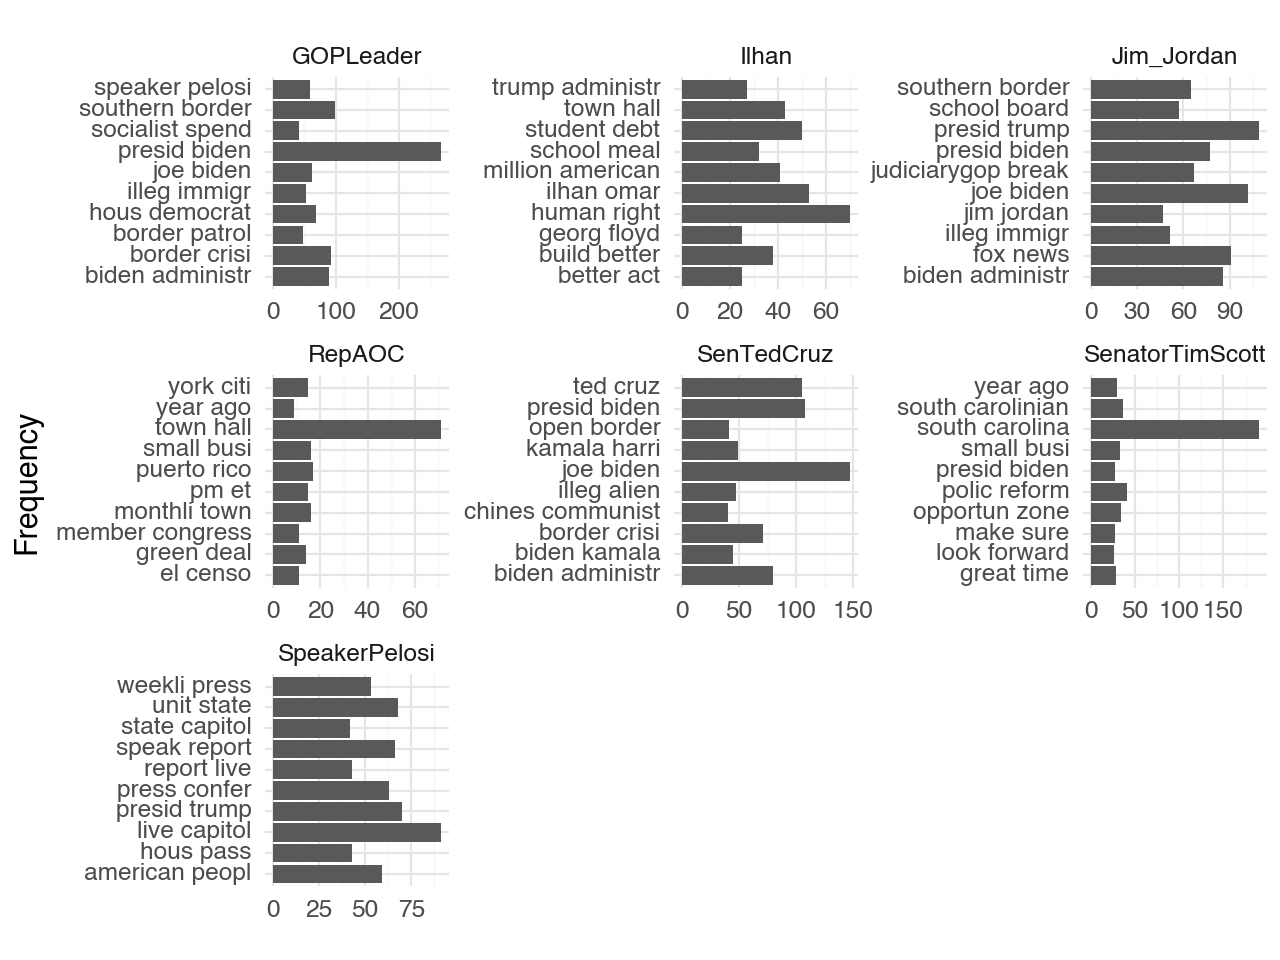

<Figure Size: (640 x 480)>

In [59]:
# visualize
from plotnine import *

# plot
(ggplot(top_terms, aes(x='variable', y='value')) +
    geom_bar(stat='identity') +
    facet_wrap('~author_tweet', scales='free') +
    coord_flip() +  # To make horizontal bar plots
    theme(subplots_adjust={'wspace': 0.25},  # Adjust the space between plots
          axis_text_y=element_text(size=10),  # Adjust text size for y axis
          figure_size=(15, 10)) +  # Adjust the figure size
    labs(x='Frequency', y='') +
 theme_minimal()
) 

In [60]:
# Term Frequency - Inverse Document Frequency (TF-IDF):
from sklearn.feature_extraction.text import TfidfVectorizer

# instantiate a vectorizer
vectorizer = TfidfVectorizer()

# get tfidf
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    # max_features=N  # Optionally restricts to top N tokens
)

# transform
text_tfidf = vectorizer.fit_transform(reps['tokens_join'])


In [61]:
# convert df
text_tfidf_pd = pd.DataFrame(text_tfidf.toarray(), 
                     columns=vectorizer.get_feature_names_out(), 
                     index=reps["author"])


# clean to capture top 10 terms
text_tfidf_pd.index.name = "author_tweet"

# contained
df_list = list()

# get top terms by group
for id, row in text_tfidf_pd.groupby("author_tweet"):
    idx = row.sum().sort_values(ascending=False).index
    temp = row.loc[:, idx].reset_index().melt(id_vars=["author_tweet"]).iloc[0:10, :]
    df_list.append(temp)

# concat
top_terms = pd.concat(df_list, axis=0)

top_terms

author_tweet  variable     value
0       GOPLeader     biden  0.442720
1       GOPLeader    border  0.342638
2       GOPLeader  democrat  0.300541
3       GOPLeader  american  0.210957
4       GOPLeader    presid  0.208645
..            ...       ...       ...
5   SpeakerPelosi    famili  0.151202
6   SpeakerPelosi   capitol  0.149821
7   SpeakerPelosi     trump  0.140845
8   SpeakerPelosi       act  0.133251
9   SpeakerPelosi      year  0.127727

[70 rows x 3 columns]

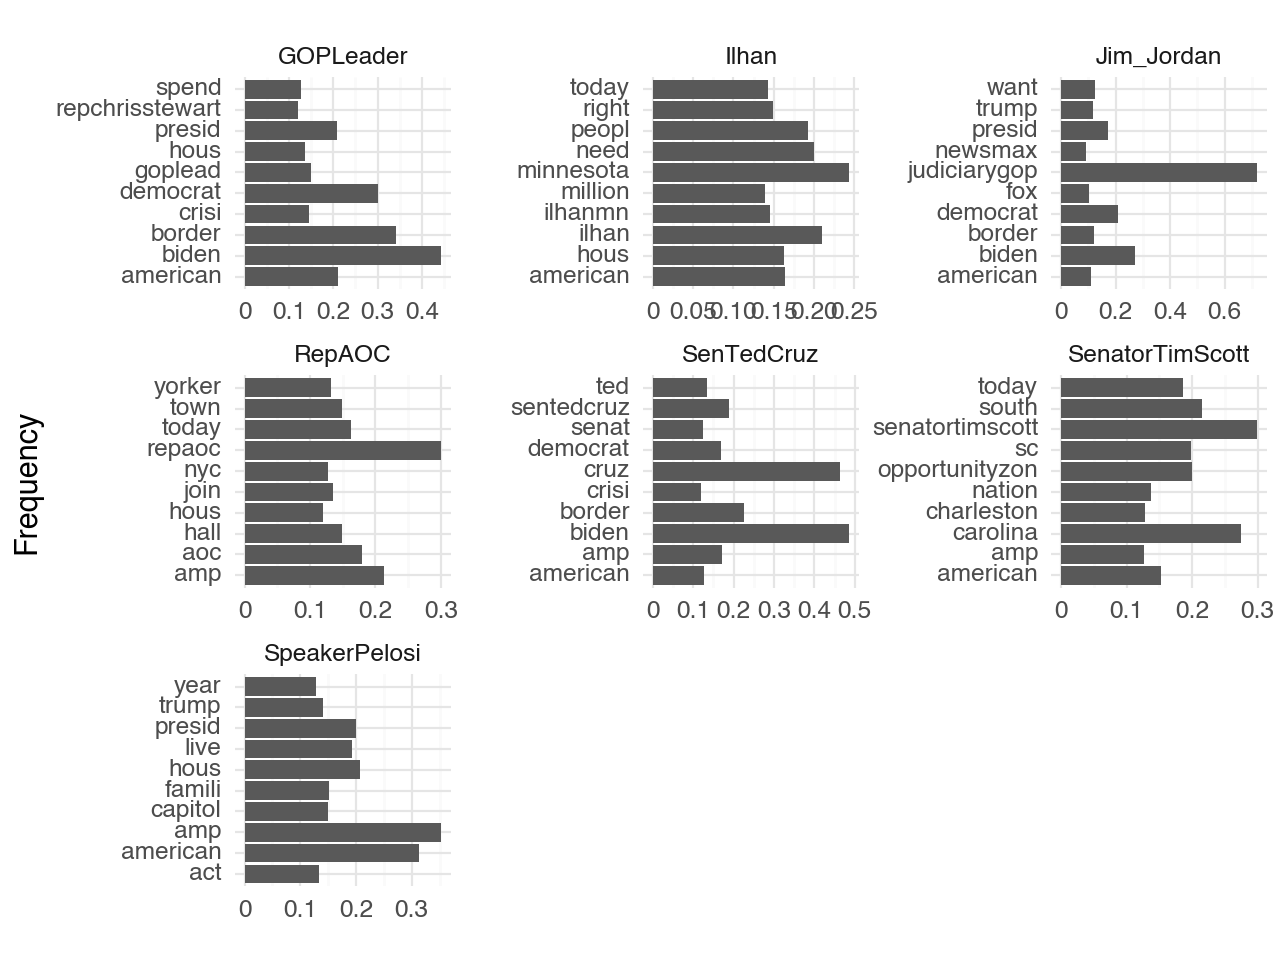

<Figure Size: (640 x 480)>

In [62]:
# visualize
from plotnine import *

# plot
(ggplot(top_terms, aes(x='variable', y='value')) +
    geom_bar(stat='identity') +
    facet_wrap('~author_tweet', scales='free') +
    coord_flip() +  # To make horizontal bar plots
    theme(subplots_adjust={'wspace': 0.25},  # Adjust the space between plots
          axis_text_y=element_text(size=10),  # Adjust text size for y axis
          figure_size=(15, 10)) +  # Adjust the figure size
    labs(x='Frequency', y='') +
 theme_minimal()
) 

## Practice:

Repeate the process described above, but using a different grouping variable. In this case, you can: 
    
- either group using other variables in the data (day, party, state)

- use other politicians. 

Use one of the metric below (count, tfidf or bigrams) to understand the most important words for each group. 

In [ ]:
# your code here

## Similarity between documents

Let's now calculate measures of similarity between the authors of the tweets. Notice, this could be done for each tweet, or for all the politicians. We will focus on the latter just to make things more interesting. 

Here is our similarity measure: 

$$\text{Sim}(A, B) = \frac{{A \cdot B}}{{\|A\| \|B\|}}$$

Where:

-   The $\cdot$ here means a dot product: $\sum_j \mathbf{a_j} \cdot \mathbf{b_j}$
-   The vector norm $\mathbf{||A||} = \sqrt{\sum \mathbf{{a_j}^2}}$

We will use as an input the tf-idf matrix! The function (which is similar to the one you wrote in problem set 2) is implemented with the `sklearn` library

In [63]:
# import
from sklearn.metrics.pairwise import cosine_similarity

# re-estimate tf-idf
vectorizer = TfidfVectorizer()

# transform
text_tfidf = vectorizer.fit_transform(reps['tokens_join'])

In [64]:
# Calculate the cosine similarity between all pairs in the matrix
cosine_sim = cosine_similarity(text_tfidf, text_tfidf )

# Display the cosine similarity matrix
cosine_sim

array([[1.        , 0.46860774, 0.53976422, 0.37072597, 0.68188297,
        0.46312371, 0.53468698],
       [0.46860774, 1.        , 0.32128238, 0.59587565, 0.39043828,
        0.53491185, 0.67609217],
       [0.53976422, 0.32128238, 1.        , 0.25702161, 0.43712255,
        0.31630066, 0.35650099],
       [0.37072597, 0.59587565, 0.25702161, 1.        , 0.33853562,
        0.46278013, 0.55208889],
       [0.68188297, 0.39043828, 0.43712255, 0.33853562, 1.        ,
        0.39513423, 0.44274346],
       [0.46312371, 0.53491185, 0.31630066, 0.46278013, 0.39513423,
        1.        , 0.56210807],
       [0.53468698, 0.67609217, 0.35650099, 0.55208889, 0.44274346,
        0.56210807, 1.        ]])

In [65]:
reps["author"]

23           GOPLeader
27               Ilhan
31          Jim_Jordan
53              RepAOC
359         SenTedCruz
388    SenatorTimScott
390      SpeakerPelosi
Name: author, dtype: object

In [66]:
# convert to a df
author = reps["author"]
similarity_df = pd.DataFrame(cosine_sim, columns=reps["author"], index=reps["author"])

# similarity
similarity_df

author           GOPLeader     Ilhan  Jim_Jordan    RepAOC  SenTedCruz  \
author                                                                   
GOPLeader         1.000000  0.468608    0.539764  0.370726    0.681883   
Ilhan             0.468608  1.000000    0.321282  0.595876    0.390438   
Jim_Jordan        0.539764  0.321282    1.000000  0.257022    0.437123   
RepAOC            0.370726  0.595876    0.257022  1.000000    0.338536   
SenTedCruz        0.681883  0.390438    0.437123  0.338536    1.000000   
SenatorTimScott   0.463124  0.534912    0.316301  0.462780    0.395134   
SpeakerPelosi     0.534687  0.676092    0.356501  0.552089    0.442743   

author           SenatorTimScott  SpeakerPelosi  
author                                           
GOPLeader               0.463124       0.534687  
Ilhan                   0.534912       0.676092  
Jim_Jordan              0.316301       0.356501  
RepAOC                  0.462780       0.552089  
SenTedCruz              0.395134       0.442743  
SenatorTimScott         1.000000       0.562108  
SpeakerPelosi           0.562108       1.000000

In [67]:
# AOC closest to?
similarity_df["RepAOC"].sort_values(ascending=False)

author
RepAOC             1.000000
Ilhan              0.595876
SpeakerPelosi      0.552089
SenatorTimScott    0.462780
GOPLeader          0.370726
SenTedCruz         0.338536
Jim_Jordan         0.257022
Name: RepAOC, dtype: float64

In [68]:
# Jim Jordan closest to?
similarity_df["Jim_Jordan"].sort_values(ascending=False)

author
Jim_Jordan         1.000000
GOPLeader          0.539764
SenTedCruz         0.437123
SpeakerPelosi      0.356501
Ilhan              0.321282
SenatorTimScott    0.316301
RepAOC             0.257022
Name: Jim_Jordan, dtype: float64

In [69]:
similarity_df.columns

Index(['GOPLeader', 'Ilhan', 'Jim_Jordan', 'RepAOC', 'SenTedCruz',
       'SenatorTimScott', 'SpeakerPelosi'],
      dtype='object', name='author')

In [70]:
# Convert to tidy
df_tidy = similarity_df.reset_index().melt(id_vars='author', var_name='related_author', value_name='correlation')
df_tidy = df_tidy.sort_values(["author", "correlation"], ascending=False).copy()

In [71]:
# get order
order = df_tidy.tail(7).related_author

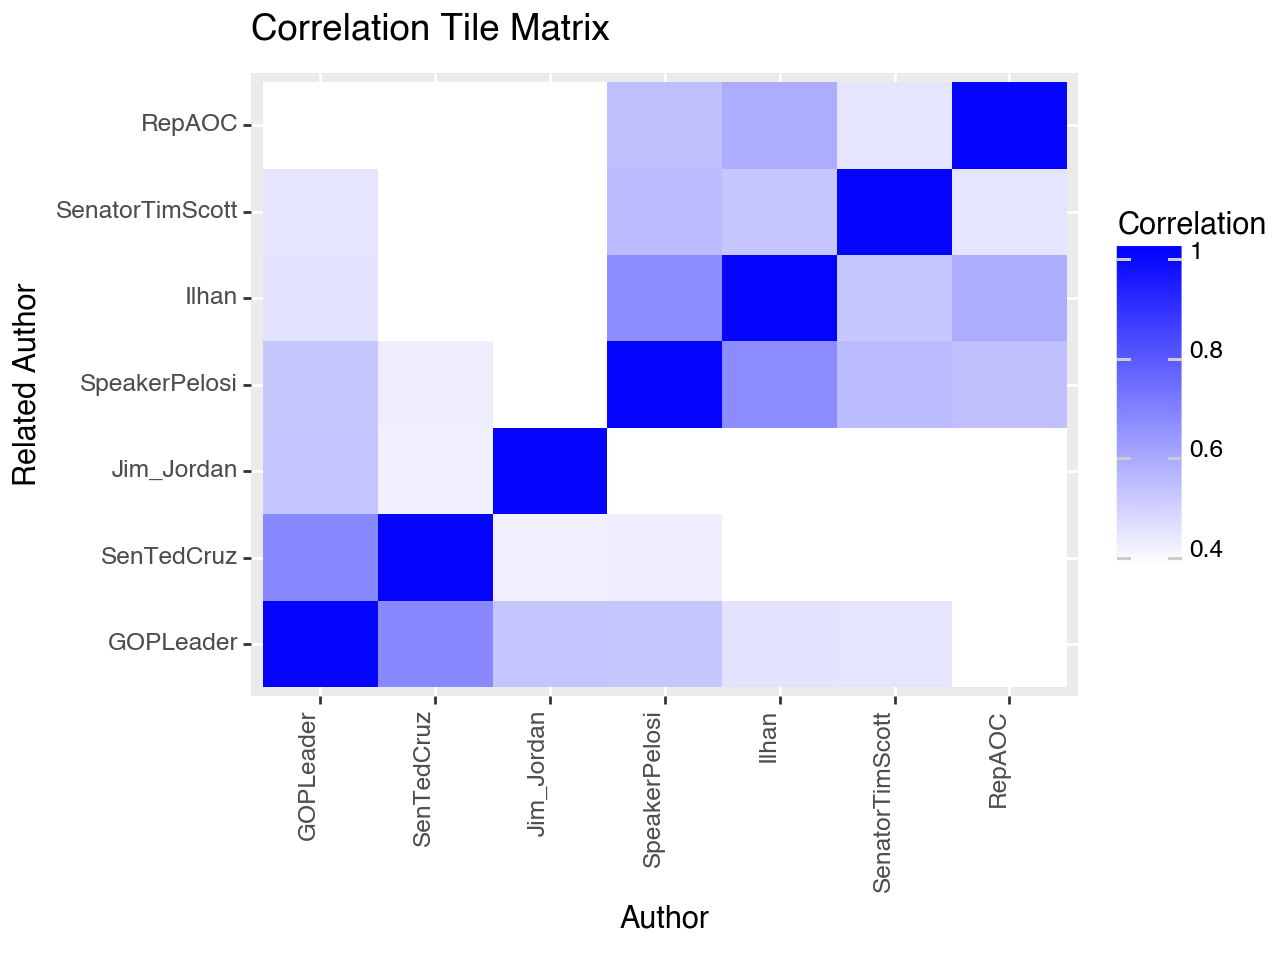

<Figure Size: (640 x 480)>

In [72]:
# Creating the heatmap
(ggplot(df_tidy, aes(x='author', y='related_author', fill='correlation'))
 + geom_tile()
 +  scale_fill_gradient(low="white", high="blue", 
                       limits=(.4, 1.01)) 
 +  scale_x_discrete(limits=order) 
 +  scale_y_discrete(limits=order) 
 + theme(axis_text_x=element_text(angle=90, hjust=1))
 + labs(title='Correlation Tile Matrix', x='Author', y='Related Author', fill='Correlation')
)

## Topic Model: LDA Implementation

To estimate topic models, we will use the `gensim` library. `gensim` is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. It is the main library to retrieve pre-trained word embeddings, or to train word embeddings using the famous word2vec algorithm. 

This is a step-by-step of estimate LDA using `gensim`:


- **Preprocess the Text:** Follow most of the steps we saw before, including tokenization, removing stopwords, normalization, etc..

- **Create a dictionary:** gensim requires you to create a dictionary of all stemmed/preprocessed words in the corpus (collection of documents); the method `Dictionary` from `gensim` will crete this data structure for us. 

- **Filter out words from the dictionary that appear in either a very low proportion of documents (lower bound) or a very high proportion of documents (upper bound)**. 

- **Create a bag-of-words representation of the documents:** maps words from the dictionary representation to each document. 

- **Estimate the topic model**: use LDA model within gensim


In [184]:
# get a sample
td = tweets_data.iloc[random.sample(range(1, tweets_data.shape[0]), 1000)].copy()

#### Step 1 - Pre-Processing

Write a function with all our previous steps

In [185]:
# Write a preprocessing function
def preprocess_text(text):
    
    # increase stop words
    stop_words = stopwords.words('english')
    stop_words = stop_words + ["http"]
    
    # tokenization 
    tokens_ = word_tokenize(text)
    
    # Generate a list of tokens after preprocessing
 
    # normalize
    tokens_ = [word.lower() for word in tokens_ if word.isalpha()]

    # stem and stopwords
    tokens_ =  [porter.stem(word) for word in tokens_ if word not in stop_words]
    # Return the preprocessed tokens as a string
    return tokens_

In [186]:
# apply
td["tokens"] = td["text"].apply(preprocess_text)

#### Step 2: Create a Dictionary

In [188]:
# import dictionar
from gensim.corpora import Dictionary

# convert to a list
tokens = td["tokens"].tolist()

# let's look what this input is. 
# should be a list of list for each document split by tokens
tokens[1]

['nationalinternday',
 'want',
 'thank',
 'intern',
 'intern',
 'offic',
 'futur',
 'staffer',
 'http']

In [189]:
# Create a dictionary representation of the documents
dictionary = Dictionary(tokens)

# see
dictionary.token2id

{'capehartj': 0,
 'insist': 1,
 'mean': 2,
 'rt': 3,
 'futur': 4,
 'http': 5,
 'intern': 6,
 'nationalinternday': 7,
 'offic': 8,
 'staffer': 9,
 'thank': 10,
 'want': 11,
 'act': 12,
 'forward': 13,
 'invest': 14,
 'legisl': 15,
 'make': 16,
 'move': 17,
 'pass': 18,
 'summer': 19,
 'sweep': 20,
 'vote': 21,
 'bowmanraid': 22,
 'citizenship': 23,
 'digit': 24,
 'googl': 25,
 'huge': 26,
 'repres': 27,
 'student': 28,
 'talk': 29,
 'taylor': 30,
 'van': 31,
 'amp': 32,
 'brought': 33,
 'continu': 34,
 'incred': 35,
 'past': 36,
 'rebuild': 37,
 'recov': 38,
 'year': 39,
 'inform': 40,
 'safe': 41,
 'stay': 42,
 'sure': 43,
 'art': 44,
 'counti': 45,
 'cultur': 46,
 'davidson': 47,
 'elig': 48,
 'fund': 49,
 'locat': 50,
 'metro': 51,
 'nonprofit': 52,
 'oper': 53,
 'come': 54,
 'congression': 55,
 'district': 56,
 'great': 57,
 'hous': 58,
 'member': 59,
 'new': 60,
 'relev': 61,
 'research': 62,
 'york': 63,
 'bart': 64,
 'discuss': 65,
 'hughhewitt': 66,
 'issu': 67,
 'legaci': 68,
 

#### Step 3: Filter out words

This is a additional pre-processing task. More meaningful topics comes when we remove rare and overly common words`

In [190]:
# Filter out words that occur in less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

#### Step 4: Create a bag-of-words representation of the documents

In [191]:
# Create a bag-of-words representation of the documents

# notice here you are just inputign every doc in a .doc2bow methods
corpus = [dictionary.doc2bow(doc) for doc in tokens]

# see case by case
# tuple with (id for every token, frequency) 
dictionary.doc2bow(tokens[0])

[(0, 1)]

#### Step 5 - Fit the model

In [192]:
from gensim.models.ldamodel import LdaModel

# Make an index to word dictionary
temp = dictionary[0]  # This is only to "load" the dictionary
id2word = dictionary.id2token

# Train the LDA model
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=10,
    eval_every=False
)

### Visualizing results



In [193]:
# Print the Keyword in the 10 topics
lda_model.print_topics()

[(0,
  '0.105*"state" + 0.063*"amp" + 0.061*"nation" + 0.054*"today" + 0.054*"live" + 0.045*"year" + 0.045*"work" + 0.036*"us" + 0.036*"famili" + 0.031*"rt"'),
 (1,
  '0.094*"rt" + 0.075*"american" + 0.057*"support" + 0.052*"must" + 0.052*"live" + 0.052*"famili" + 0.050*"take" + 0.033*"great" + 0.033*"administr" + 0.024*"help"'),
 (2,
  '0.154*"thank" + 0.065*"one" + 0.057*"must" + 0.057*"year" + 0.049*"act" + 0.041*"congress" + 0.041*"bill" + 0.041*"presid" + 0.033*"amp" + 0.033*"hous"'),
 (3,
  '0.085*"work" + 0.066*"trump" + 0.055*"presid" + 0.048*"act" + 0.048*"famili" + 0.044*"rt" + 0.041*"honor" + 0.033*"amp" + 0.033*"american" + 0.030*"million"'),
 (4,
  '0.113*"time" + 0.073*"american" + 0.073*"help" + 0.057*"today" + 0.057*"call" + 0.057*"job" + 0.049*"week" + 0.041*"rt" + 0.041*"need" + 0.033*"year"'),
 (5,
  '0.101*"today" + 0.072*"rt" + 0.068*"vote" + 0.059*"great" + 0.055*"congress" + 0.047*"member" + 0.038*"right" + 0.038*"need" + 0.034*"thank" + 0.034*"health"'),
 (6,
  

### Estimate Topic Prevalence

In [196]:
# Extract topics from each documenct
td['topic'] = [sorted(lda_model[corpus][text]) for text in range(len(td["text"]))]

# expand the dataframe
df_exploded = td["topic"].explode().reset_index()

# separate information
df_exploded[["topic", "probability"]] = pd.DataFrame(df_exploded['topic'].tolist(), index=df_exploded.index)


In [197]:
# data frame with the distribution for each topic vs document
df_exploded

index  topic  probability
0     1224340      0     0.050002
1     1224340      1     0.050008
2     1224340      2     0.050000
3     1224340      3     0.050004
4     1224340      4     0.050003
...       ...    ...          ...
9995   672779      5     0.050000
9996   672779      6     0.050002
9997   672779      7     0.050004
9998   672779      8     0.050000
9999   672779      9     0.050001

[10000 rows x 3 columns]

In [199]:
# merge
df_exploded = pd.merge(df_exploded, td.reset_index(), on="index")

In [200]:
# topic prevalence
tp_prev = df_exploded.groupby("topic_x")["probability"].mean().reset_index()
tp_prev.sort_values("probability", ascending=False)

topic_x  probability
8        8     0.137033
3        3     0.110278
5        5     0.108009
7        7     0.102183
9        9     0.098605
0        0     0.094215
1        1     0.089792
4        4     0.089726
2        2     0.088123
6        6     0.082036

### Bringing the words back

In [201]:
# Get the most important words for each topic
topic_words = list()
for i in range(lda_model.num_topics):
    # Get the top words for the topic
    words = lda_model.show_topic(i, topn=10)
    topic_words.append(", ".join([word for word, prob in words]))
      

In [202]:
topic_words

['state, amp, nation, today, live, year, work, us, famili, rt',
 'rt, american, support, must, live, famili, take, great, administr, help',
 'thank, one, must, year, act, congress, bill, presid, amp, hous',
 'work, trump, presid, act, famili, rt, honor, amp, american, million',
 'time, american, help, today, call, job, week, rt, need, year',
 'today, rt, vote, great, congress, member, right, need, thank, health',
 'continu, great, rt, commun, act, year, american, day, today, amp',
 'peopl, hous, pass, student, protect, act, help, american, join, year',
 'rt, amp, tax, senat, act, bill, health, join, today, get',
 'amp, today, make, busi, nation, help, discuss, rt, join, live']

In [203]:
tp_prev["words"] = topic_words

In [204]:
tp_prev

topic_x  probability                                              words
0        0     0.094215  state, amp, nation, today, live, year, work, u...
1        1     0.089792  rt, american, support, must, live, famili, tak...
2        2     0.088123  thank, one, must, year, act, congress, bill, p...
3        3     0.110278  work, trump, presid, act, famili, rt, honor, a...
4        4     0.089726  time, american, help, today, call, job, week, ...
5        5     0.108009  today, rt, vote, great, congress, member, righ...
6        6     0.082036  continu, great, rt, commun, act, year, america...
7        7     0.102183  peopl, hous, pass, student, protect, act, help...
8        8     0.137033  rt, amp, tax, senat, act, bill, health, join, ...
9        9     0.098605  amp, today, make, busi, nation, help, discuss,...

Very nice representation of the topics. you can merge this back with the core data set and see different distributions for candidates, parties, time of the day, any other group variable you have

### We just touch the surface of unsupervised model and topic modeling here. If you want see more, take my computational linguistics class next spring!

In [207]:
!jupyter nbconvert _week_11_nlp_I.ipynb --to html --template classic

[NbConvertApp] Converting notebook _week_11_nlp_I.ipynb to html
[NbConvertApp] Writing 1098851 bytes to _week_11_nlp_I.html
